## Libraries

In [12]:
import pandas as pd
from IPython.core.display import display, HTML
from Levenshtein import distance
import numpy as np
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [82]:
display(HTML("<style>.container { width:100% !important; }</style>"))

## Dataset import

In [84]:
input_filename = './data/donors_occupation_raw.csv'
data = pd.read_csv(input_filename, sep = ',', encoding = 'latin-1')

In [85]:
data.head(5)

,DONOR_ID,OCCUPATION,CHURN
0,32,Lic. en Comunicación Social,1
1,43,EMPLEADO,0
2,44,Prod.Agropecuario,0
3,45,Implementador,1
4,47,Empleada,0


In [86]:
data.shape

(62393, 3)

## Preprocess

In [87]:
# lowercase
data['OCCUPATION_PROCESSED'] = data['OCCUPATION'].str.lower()

# remove accents
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.replace('á','a')
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.replace('é','e')
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.replace('í','i')
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.replace('ó','o')
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.replace('ú','u')

# replace punctuation with empty space
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.replace('.',' ')

# remove whitspaces at beginning and end
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.rstrip()
data['OCCUPATION_PROCESSED'] = data['OCCUPATION_PROCESSED'].str.lstrip()

# normalize spanish gender (change 'a' and 'o' for 'e') - Lenguaje Inclusivo: 
inclusive = lambda x:  x[:-1]+'e' if x.endswith('o') or x.endswith('a') is True else x
lista = []
for item in data.iloc[:,-1]:
    if type(item) != str:
        lista.append('Null')
        continue
    else:
        lista.append(inclusive(item))

data['OCCUPATION_PROCESSED'] = pd.DataFrame(lista)

In [88]:
data.shape

(62393, 4)

In [89]:
data.head(10)

,DONOR_ID,OCCUPATION,CHURN,OCCUPATION_PROCESSED
0,32,Lic. en Comunicación Social,1,lic en comunicacion social
1,43,EMPLEADO,0,empleade
2,44,Prod.Agropecuario,0,prod agropecuarie
3,45,Implementador,1,implementador
4,47,Empleada,0,empleade
5,48,Ingeniero,0,ingeniere
6,49,asistente celador,0,asistente celador
7,51,Contador,1,contador
8,53,estudianes,1,estudianes
9,57,contador,0,contador


In [90]:
#  Cantidad de menciones de cada uno

occupations_q = data.groupby('OCCUPATION_PROCESSED').count().sort_values(by = 'DONOR_ID', ascending = False)
occupations_q = occupations_q.loc[occupations_q['DONOR_ID'] >= 30 ]
occupations_q

,DONOR_ID,OCCUPATION,CHURN
OCCUPATION_PROCESSED,,,
empleade,11729,11729,11729
jubilade,4255,4255,4255
docente,3775,3775,3775
abogade,2351,2351,2351
estudiante,1913,1913,1913
ama de case,1879,1879,1879
comerciante,1750,1750,1750
medice,1334,1334,1334
administrative,1262,1262,1262


## Occupation normalization

In [91]:
normalized_occupations = occupations_q.index
small_list_occupations = data['OCCUPATION_PROCESSED'].values

List2 = normalized_occupations
List1 = small_list_occupations

Matrix = np.zeros((len(List1),len(List2)),dtype=np.int)

for i in range(0,len(List1)):
  for j in range(0,len(List2)):
      Matrix[i,j] = distance(List1[i],List2[j])

distance_matrix = pd.DataFrame(Matrix, columns = List2 , index = List1)


In [92]:
distance_matrix.head()

OCCUPATION_PROCESSED,empleade,jubilade,docente,abogade,estudiante,ama de case,comerciante,medice,administrative,empresarie,empleada administrative,ingeniere,arquitecte,psicologe,contadore,contador,docente jubilade,contador publice,bbva frances,periodiste,economiste,profesore,bioquimice,enfermere,profesional,...,lic en administracion,hjjgjgkgkg,pediatre,instrumentadora quirurgice,terapeute,turisme,cocinere,profesora de ingles,politologe,artesane,"servicios n, c, p,",rrhh,quimice,ingeniera agronome,empleada judicial,mecanice,estudiante y empleade,actriz,comunicadora social,empleada y estudiante,diseñadora de indumentarie,estudiante universitarie,medica pediatre,administrador,chef
lic en comunicacion social,24,24,24,25,22,21,21,24,23,23,23,23,24,23,22,22,21,21,23,23,21,24,21,24,21,...,14,27,24,24,25,24,22,23,23,24,22,27,23,20,20,22,24,24,12,24,24,23,22,23,25
empleade,0,5,6,5,7,7,8,6,11,4,15,8,8,8,7,7,12,14,10,8,8,7,9,7,10,...,18,10,7,22,6,7,7,15,9,6,17,8,7,15,10,7,13,8,16,13,22,20,11,10,7
prod agropecuarie,14,15,13,13,15,13,12,14,14,11,16,13,13,14,12,13,15,12,14,14,14,11,14,13,12,...,17,16,12,20,12,15,13,13,13,12,17,15,15,16,15,13,17,13,17,16,18,17,12,15,16
implementador,7,11,10,11,11,10,11,11,13,9,15,10,11,12,8,7,14,15,13,11,11,10,12,11,11,...,15,13,10,17,11,11,12,17,11,11,17,13,12,14,12,10,17,12,16,14,19,19,13,9,12
empleade,0,5,6,5,7,7,8,6,11,4,15,8,8,8,7,7,12,14,10,8,8,7,9,7,10,...,18,10,7,22,6,7,7,15,9,6,17,8,7,15,10,7,13,8,16,13,22,20,11,10,7


In [93]:
min_distance_matrix = distance_matrix.min(axis = 1)
min_distance_matrix = min_distance_matrix.to_frame(name = 'min_distance')
min_distance_matrix 
min_distance_matrix['threshold'] = min_distance_matrix.index

In [94]:
lista = []
for item,minimum in zip(min_distance_matrix.index,min_distance_matrix['min_distance']):
    if minimum > len(item) / 2:
        result = 9999
    else:
        result = minimum
    lista.append(result)

In [95]:
minimum = pd.DataFrame(lista, columns = ['MINIMUM']) 

In [96]:
minimum.shape

(62393, 1)

In [97]:
minimum = pd.DataFrame(min_distance_matrix.index, columns = ['OCCUPATION_PROCESSED']).join(minimum)

In [98]:
a = pd.DataFrame(distance_matrix.idxmin(axis=1), columns = ['OCCUPATION_FINALE'])

In [99]:
a = a.reset_index()

In [100]:
tabla = a.merge(minimum, left_index = True, right_index = True, how = 'left' )

In [101]:
lista = []
for (item,numero) in zip(tabla['OCCUPATION_FINALE'],tabla['MINIMUM']):
    if numero == 9999:
        result = 'otre'
    else :
        result = item
    lista.append(result)
dm = pd.DataFrame(lista, columns = ['OCCUPATION_NORMALIZED'])

## Merge original data with normalized occupation

In [102]:
final_data = data.merge(dm, right_index = True, left_index = True) 

In [104]:
final_data = final_data.drop('OCCUPATION_PROCESSED', 1)

In [105]:
final_aggregate = final_data.groupby('OCCUPATION_NORMALIZED').count().sort_values(by = 'DONOR_ID', ascending = False)
top = final_aggregate[0:20]

In [154]:
final_aggregate.to_clipboard

<bound method NDFrame.to_clipboard of                             DONOR_ID  OCCUPATION  CHURN
OCCUPATION_NORMALIZED                                  
empleade                       11955       11955  11955
otre                            7836        7834   7836
jubilade                        4357        4357   4357
docente                         3841        3841   3841
abogade                         2381        2381   2381
estudiante                      2028        2028   2028
ama de case                     1993        1993   1993
comerciante                     1829        1829   1829
medice                          1417        1417   1417
administrative                  1390        1390   1390
empleada administrative         1094        1094   1094
empresarie                       989         989    989
ingeniere                        947         947    947
arquitecte                       736         736    736
contadore                        703         703    703
psicologe 

In [124]:
final_aggregate = final_data.groupby('OCCUPATION_NORMALIZED').count().sort_values(by = 'DONOR_ID', ascending = False)
top = final_aggregate[0:20]

final_data_churn = final_data.loc[final_data['CHURN'] == 1]
churn_aggregate = final_data_churn.groupby('OCCUPATION_NORMALIZED').count().sort_values(by = 'DONOR_ID', ascending = False)
top_churn = churn_aggregate[0:20]


final_data_no_churn = final_data.loc[final_data['CHURN'] == 0]
no_churn_aggregate = final_data_no_churn.groupby('OCCUPATION_NORMALIZED').count().sort_values(by = 'DONOR_ID', ascending = False)
top_no_churn = no_churn_aggregate[0:20]

In [145]:
bars = top.index
N = len(bars)
ind = np.arange(N)
Churn = top_churn['DONOR_ID']
No_Churn = top_no_churn['DONOR_ID']
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, Churn, width)
p2 = plt.bar(ind, No_Churn, width, bottom=Churn)

plt.ylabel('Cantidad de donantes')
plt.title('Ocupaciones y status de donación')
plt.xticks(ind, bars, rotation='vertical')
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Churn', 'No Churn'))


## Export Data & Graph

In [146]:
final_data.to_csv('./results/donors_occupation_normalized.csv', index = False)

In [147]:
plt.savefig('./results/occupation_graph.jpg')

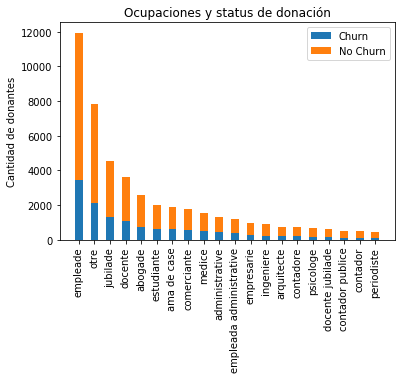

In [148]:
plt.show()